# calculate betweenness centrality


In [12]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct
import networkx as nx

In [59]:
def get_networkx_matrix(graph_obj, df, name_str, coauthor_str, inv_weight=False):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: graph object with number of shared co-authored publications
    '''
    # names = df.loc[:,name_str]
    # coauthor_matrix = np.zeros((names.size, names.size))
    graph_obj.add_nodes_from(df[name_str])
    for idx, author in df.iterrows():
        auth_name = author[name_str]
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            #add the nodes
            for coauthor in coauthors.keys():
                if inv_weight:
                    graph_obj.add_edge(auth_name, coauthor, weight=int((1/coauthors[coauthor])*100)) #invert and convert to int to prevent floating number errors as suggested
                else:
                    graph_obj.add_edge(auth_name, coauthor, weight=coauthors[coauthor]) 
                    

        except:
            print(auth_name, "has no coauthors")
            
    
    print("\n")
    return graph_obj

In [54]:
def get_coauthor_matrix(df, name_str, coauthor_str):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: numpy array NxN with number of shared co-authored publications
    '''
    names = df.loc[:,name_str]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author[name_str]
        # row = names[names == auth_name].index[0]
        row = idx
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor] #number of publications together
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [16]:
# plt.matshow(scival_coauthor_matrix,cmap="Wistia",norm="linear")
# plt.matshow(gs_coauthor_matrix,cmap="Wistia",norm="linear")
def graph_matrix(coauthor_matrix, title, names):
    ''' creates a heatmap of coauthor matrix
    
    Parameters
    ----------
    coauthor_matrix: NxN array
        contains adjacency matrix of the author and coauthor information

    title: str
        title of the graph

    names: Nx1 list
        list of author names in order of the matrix
    '''

    fig, ax = plt.subplots()
    im = ax.imshow(coauthor_matrix, cmap="YlOrRd")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(names)), labels=names, fontsize="xx-small")
    ax.set_yticks(np.arange(len(names)), labels=names, fontsize="xx-small")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, int(coauthor_matrix[i, j]),
                        ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(10, 10)
    plt.show()

In [36]:
def plot_comparison_graph(ordered_df, title, xlabel_str):
    '''
    parameters
    --------
    ordered_df: pandas df 
        should have columns titled "Name", "SciVal", "Google Scholar"
    title: str
        string of title name
    '''
    species = ordered_df["Name"].to_list()
    penguin_means = {
        'SciVal': ordered_df["SciVal"].to_list(),
        'Google Scholar': ordered_df["Google Scholar"].to_list(),
    }

    x = np.arange(len(species))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    fig.set_size_inches(10, 8)
    plt.title(title)

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        # if attribute=="Scival":
        #     ax.bar_label(rects, padding=3, color = "blue")
        # elif attribute=="Google Scholar":
        #     ax.bar_label(rects, padding=3, color = "orange")
        multiplier += 1

    ax.set_xlabel(xlabel_str)
    ax.set_title(title)
    ax.set_yticks(x + width, labels=species)
    ax.legend(loc='lower right')

# betweenness centrality

In [30]:
combined_df = pd.read_csv("authors_comparisons_updated2.csv")

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




networkx weighted betweenness centrality

In [60]:
sv_g = get_networkx_matrix(nx.Graph(),combined_df,'sv_name','sv_coauthors',inv_weight=True)
gs_g = get_networkx_matrix(nx.Graph(),combined_df,'gs_name','gs_coauthors', inv_weight=True)

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [61]:
# get names for axes
sv_names = combined_df["sv_name"].tolist()

# get networkX graph betweenness centrality
sv_BC_dict = nx.betweenness_centrality(sv_g, weight="weight")
sv_BC_weighted = [val for key, val in sv_BC_dict.items()]
print(sv_BC_weighted)

gs_BC_dict = nx.betweenness_centrality(gs_g, weight="weight")
gs_BC_weighted = [val for key, val in gs_BC_dict.items()]
print(gs_BC_weighted)


[0.33535353535353535, 0.0, 0.050505050505050504, 0.06464646464646465, 0.031313131313131314, 0.03939393939393939, 0.0, 0.10656565656565657, 0.08282828282828283, 0.0, 0.0, 0.09696969696969697, 0.1393939393939394, 0.0, 0.13333333333333333, 0.0, 0.0, 0.045454545454545456, 0.1111111111111111, 0.00202020202020202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10353535353535354, 0.0, 0.0, 0.00202020202020202, 0.010606060606060607, 0.10404040404040404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10404040404040404, 0.0, 0.0, 0.0, 0.03535353535353535]
[0.3676178451178452, 0.0, 0.1302020202020202, 0.06776094276094274, 0.07818181818181819, 0.023771043771043773, 0.027525252525252526, 0.1152946127946128, 0.32499158249158255, 0.004545454545454545, 0.0, 0.07565656565656566, 0.06410774410774411, 0.0, 0.052525252525252523, 0.0, 0.0, 0.1876178451178451, 0.27610269360269357, 0.0595959595959596, 0.0, 0.0, 0.0, 0.0202020202020202, 0.0, 0.0, 0.05721380471380471, 0.0, 0.0, 0.12146464646464646, 0.025109427609427606, 0.03

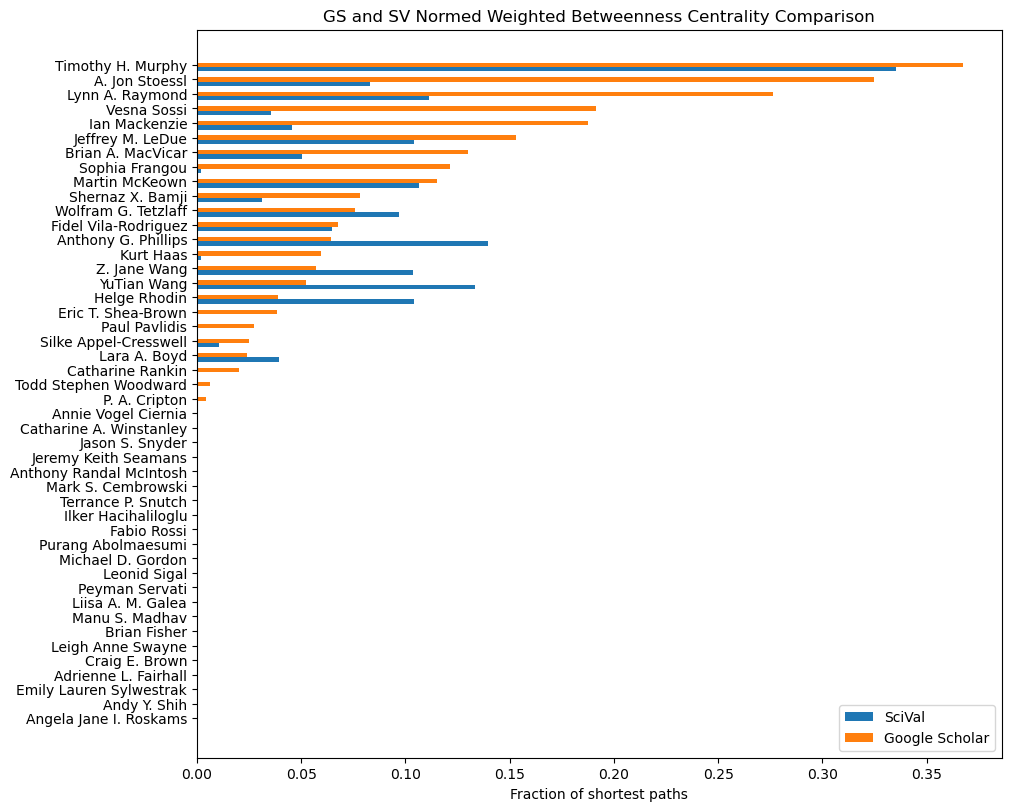

In [62]:
weighted_centrality_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":sv_BC_weighted,
    "Google Scholar":gs_BC_weighted,
})

weighted_ordered_df = weighted_centrality_df.sort_values(by="Google Scholar", ascending=True)

plot_comparison_graph(weighted_ordered_df, "GS and SV Normed Weighted Betweenness Centrality Comparison", "Fraction of shortest paths")

bct weighted betweenness centrality

In [ ]:
sv_coauthor_matrix = get_coauthor_matrix(combined_df, "sv_name", "sv_coauthors")
gs_coauthor_matrix = get_coauthor_matrix(combined_df, "gs_name", "gs_coauthors")

In [33]:
inversed_sv_matrix = 1/sv_coauthor_matrix[sv_coauthor_matrix > 0]
sv_coauthor_matrix[sv_coauthor_matrix > 0] = inversed_sv_matrix

inversed_gs_matrix = 1/gs_coauthor_matrix[gs_coauthor_matrix > 0]
gs_coauthor_matrix[gs_coauthor_matrix > 0] = inversed_gs_matrix

gs_weighted_centrality = bct.betweenness_wei(gs_coauthor_matrix)
sv_weighted_centrality = bct.betweenness_wei(sv_coauthor_matrix)

gs_weighted_centrality_normed = gs_weighted_centrality*2/((len(gs_weighted_centrality)-1)*(len(gs_weighted_centrality)-2))
sv_weighted_centrality_normed = sv_weighted_centrality*2/((len(sv_weighted_centrality)-1)*(len(sv_weighted_centrality)-2))

[[0.  0.  0.5 ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.5 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


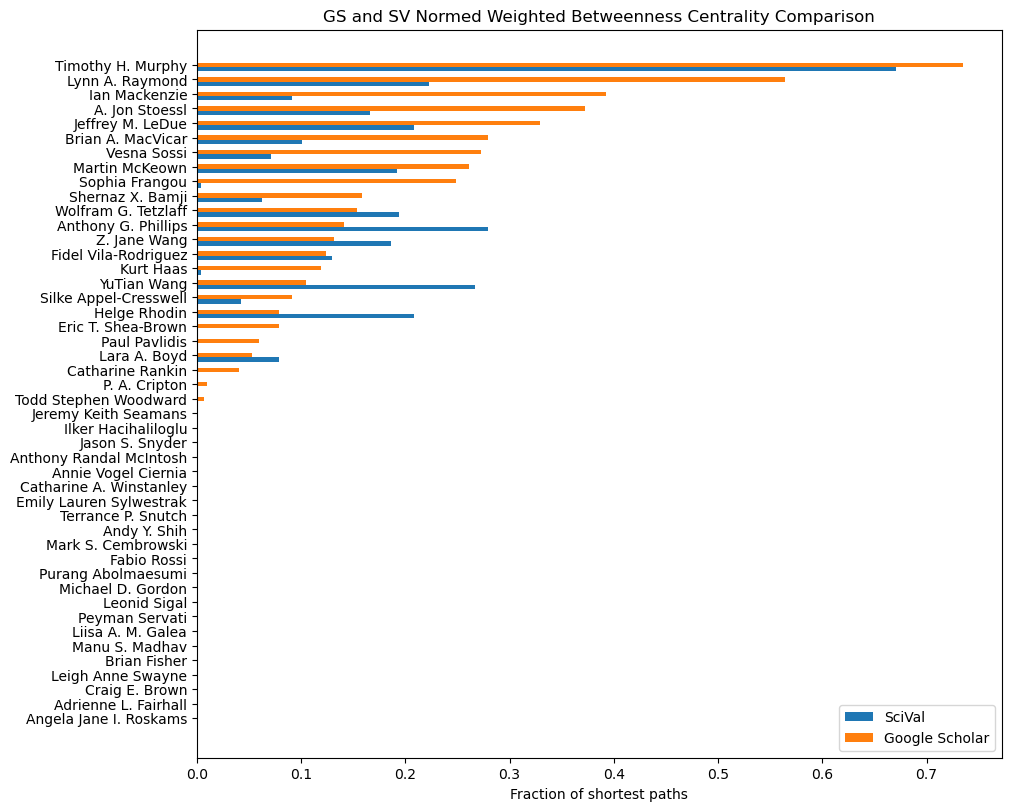

In [65]:
weighted_centrality_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":sv_weighted_centrality_normed,
    "Google Scholar":gs_weighted_centrality_normed,
})

weighted_ordered_df = weighted_centrality_df.sort_values(by="Google Scholar", ascending=True)

plot_comparison_graph(weighted_ordered_df, "GS and SV Normed Weighted Betweenness Centrality Comparison", "Fraction of shortest paths")

In [69]:
print(weighted_ordered_df)

                       Name    SciVal  Google Scholar
22   Angela Jane I. Roskams  0.000000        0.000000
36     Adrienne L. Fairhall  0.000000        0.000000
35           Craig E. Brown  0.000000        0.000000
34        Leigh Anne Swayne  0.000000        0.000000
33             Brian Fisher  0.000000        0.000000
32           Manu S. Madhav  0.000000        0.000000
28        Liisa A. M. Galea  0.000000        0.000000
27           Peyman Servati  0.000000        0.000000
25             Leonid Sigal  0.000000        0.000000
24        Michael D. Gordon  0.000000        0.000000
44       Purang Abolmaesumi  0.000000        0.000000
21              Fabio Rossi  0.000000        0.000000
20       Mark S. Cembrowski  0.000000        0.000000
39             Andy Y. Shih  0.000000        0.000000
16       Terrance P. Snutch  0.000000        0.000000
38  Emily Lauren Sylwestrak  0.000000        0.000000
13  Catharine A. Winstanley  0.000000        0.000000
1       Annie Vogel Ciernia 

networkx unweighted betweenness centrality

In [ ]:
# sv networkx graph
sv_G = get_networkx_matrix(nx.Graph(),combined_df,'sv_name','sv_coauthors')

sv_BC_dict = nx.betweenness_centrality(sv_G)
sv_BC = [val for key, val in sv_BC_dict.items()]
sv_names = [key for key, val in sv_BC_dict.items()]

# gs networkx graph
gs_G = get_networkx_matrix(nx.Graph(),combined_df,'gs_name','gs_coauthors')

gs_BC_dict = nx.betweenness_centrality(gs_G)
gs_BC = [val for key, val in gs_BC_dict.items()]
gs_names = [key for key, val in gs_BC_dict.items()]

bct unweighted betweenness centrality

In [ ]:
##binarize coauthor matrix for betweennness_bin
# sv_coauthor_matrix[sv_coauthor_matrix > 0] = 1
# gs_coauthor_matrix[gs_coauthor_matrix > 0] = 1

## get matrices
# gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
# scival_centrality = bct.betweenness_bin(sv_coauthor_matrix)

## get normed betweenness centrality
# gs_centrality_normed = gs_centrality/(((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))/2)
# scival_centrality_normed = scival_centrality/(((len(sv_coauthor_matrix)-1)*(len(sv_coauthor_matrix)-2))/2)

##normalize by publications
# gs_BC_adjusted = gs_centrality/np.array([data for data in combined_df["gs_count"]])
# scival_BC_adjusted = scival_centrality/np.array([data for data in combined_df["sv_count"]])

# degrees comparison

networkx degrees

In [89]:
sv_degrees_networkX = [len([n for n in sv_g.neighbors(node)]) for node in sv_g.nodes]
gs_degrees_networkX = [len([n for n in gs_g.neighbors(node)]) for node in gs_g.nodes]

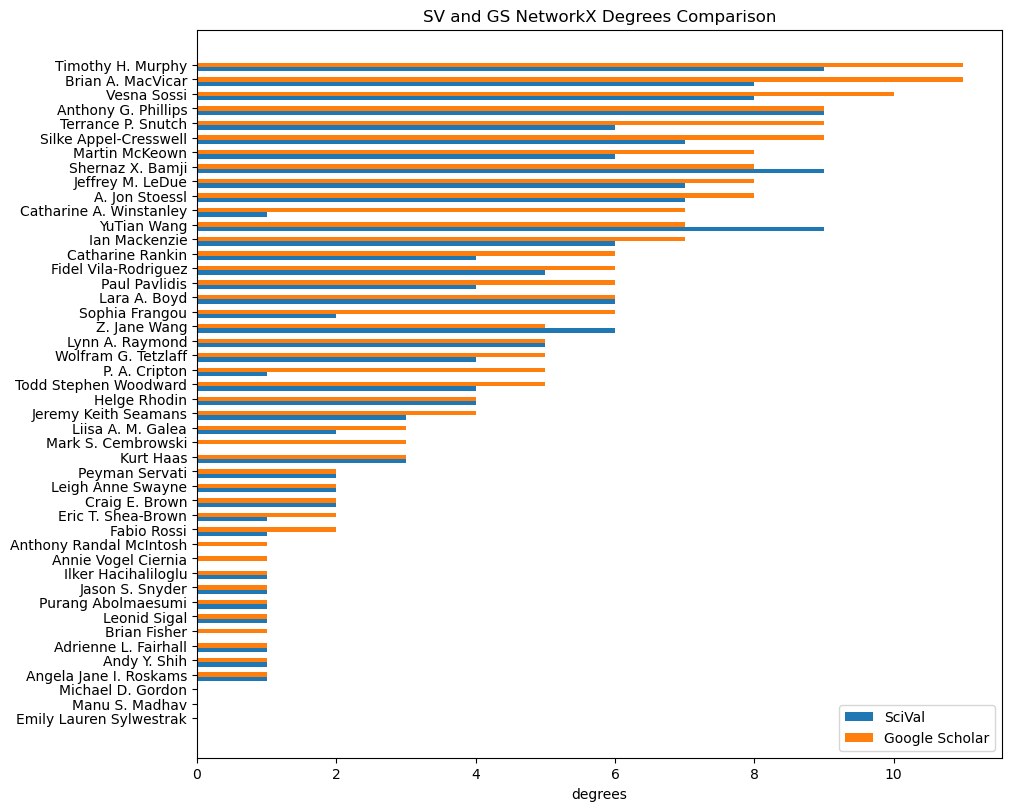

In [90]:
degree_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":sv_degrees_networkX,
    "Google Scholar":gs_degrees_networkX,
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)
plot_comparison_graph(ordered_df, "SV and GS NetworkX Degrees Comparison", "degrees")

networkx degree centrality

In [73]:
gs_DC_dict = nx.degree_centrality(gs_G)
gs_DC = np.array([val for key, val in gs_DC_dict.items()])

sv_DC_dict = nx.degree_centrality(sv_G)
sv_DC = np.array([val for key, val in sv_DC_dict.items()])

In [74]:
sv_degrees = np.array(sv_DC)*len(sv_G.edges)
gs_degrees = np.array(gs_DC)*len(gs_G.edges)

degree_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":sv_degrees,
    "Google Scholar":gs_degrees,
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)

In [ ]:
# degree centrality is not just number of neighbors per node/all neighbors

In [83]:
print("calculated degree centrality:\n",sv_DC)
print("number of edges:",len(sv_G.edges))
print("number of neighbors per node:\n",sv_degrees)

calculated degree centrality:
 [0.2        0.         0.17777778 0.11111111 0.2        0.13333333
 0.08888889 0.13333333 0.15555556 0.02222222 0.02222222 0.08888889
 0.2        0.02222222 0.2        0.06666667 0.13333333 0.13333333
 0.11111111 0.06666667 0.         0.02222222 0.02222222 0.08888889
 0.         0.02222222 0.13333333 0.04444444 0.04444444 0.04444444
 0.15555556 0.08888889 0.         0.         0.04444444 0.04444444
 0.02222222 0.02222222 0.         0.02222222 0.08888889 0.15555556
 0.02222222 0.         0.02222222 0.17777778]
number of edges: 80
number of neighbors per node:
 [16.          0.         14.22222222  8.88888889 16.         10.66666667
  7.11111111 10.66666667 12.44444444  1.77777778  1.77777778  7.11111111
 16.          1.77777778 16.          5.33333333 10.66666667 10.66666667
  8.88888889  5.33333333  0.          1.77777778  1.77777778  7.11111111
  0.          1.77777778 10.66666667  3.55555556  3.55555556  3.55555556
 12.44444444  7.11111111  0.          

In [84]:
print("calculated degree centrality:\n",gs_DC)
print("number of edges:",len(gs_G.edges))
print("number of neighbors per node:\n",gs_degrees)

calculated degree centrality:
 [0.24444444 0.02222222 0.24444444 0.13333333 0.17777778 0.13333333
 0.13333333 0.17777778 0.17777778 0.11111111 0.02222222 0.11111111
 0.2        0.15555556 0.15555556 0.08888889 0.2        0.15555556
 0.11111111 0.06666667 0.06666667 0.04444444 0.02222222 0.13333333
 0.         0.02222222 0.11111111 0.04444444 0.06666667 0.13333333
 0.2        0.08888889 0.         0.02222222 0.04444444 0.04444444
 0.02222222 0.04444444 0.         0.02222222 0.11111111 0.17777778
 0.02222222 0.02222222 0.02222222 0.22222222]
number of edges: 102
number of neighbors per node:
 [24.93333333  2.26666667 24.93333333 13.6        18.13333333 13.6
 13.6        18.13333333 18.13333333 11.33333333  2.26666667 11.33333333
 20.4        15.86666667 15.86666667  9.06666667 20.4        15.86666667
 11.33333333  6.8         6.8         4.53333333  2.26666667 13.6
  0.          2.26666667 11.33333333  4.53333333  6.8        13.6
 20.4         9.06666667  0.          2.26666667  4.533333

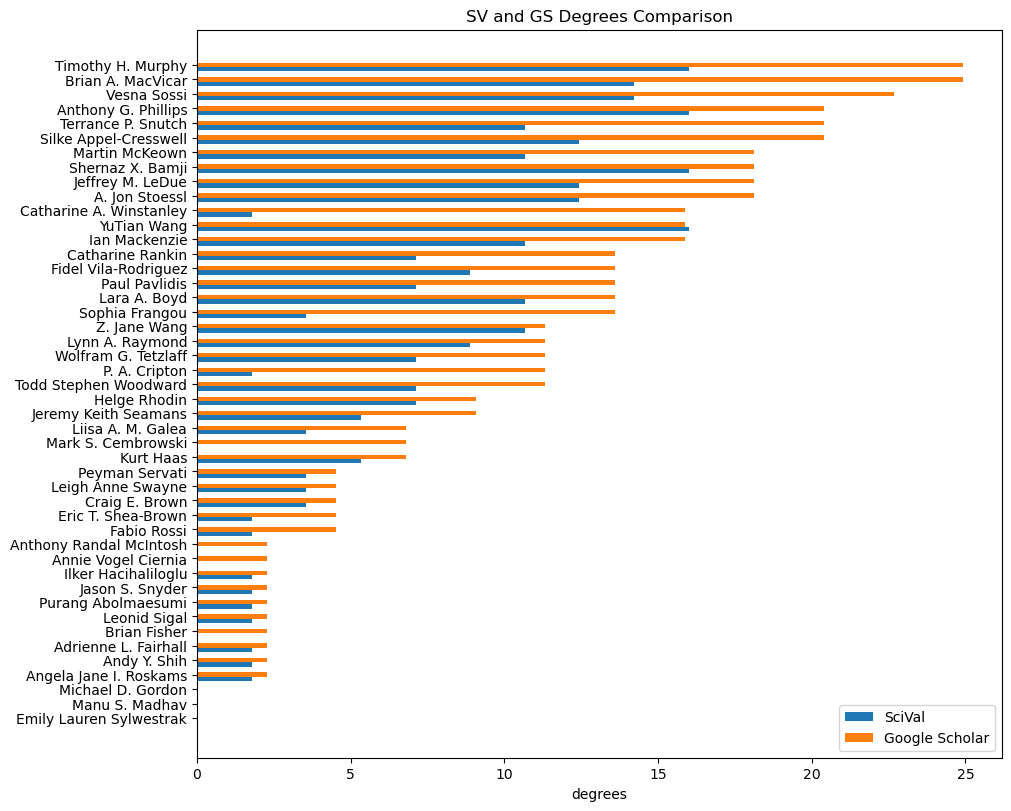

In [75]:
plot_comparison_graph(ordered_df, "SV and GS Degrees Comparison", "degrees")

bct degrees (already calculated in the csv file using bct.degrees_und(coauthor adjacency matrix))

<bound method NDFrame.head of                        Name  SciVal  Google Scholar
38  Emily Lauren Sylwestrak       0               0
32           Manu S. Madhav       0               0
24        Michael D. Gordon       0               0
22   Angela Jane I. Roskams       1               1
39             Andy Y. Shih       1               1
36     Adrienne L. Fairhall       1               1
33             Brian Fisher       0               1
25             Leonid Sigal       1               1
44       Purang Abolmaesumi       1               1
10          Jason S. Snyder       1               1
42      Ilker Hacihaliloglu       1               1
1       Annie Vogel Ciernia       0               1
43  Anthony Randal McIntosh       0               1
21              Fabio Rossi       1               2
37       Eric T. Shea-Brown       1               2
35           Craig E. Brown       2               2
34        Leigh Anne Swayne       2               2
27           Peyman Servati       

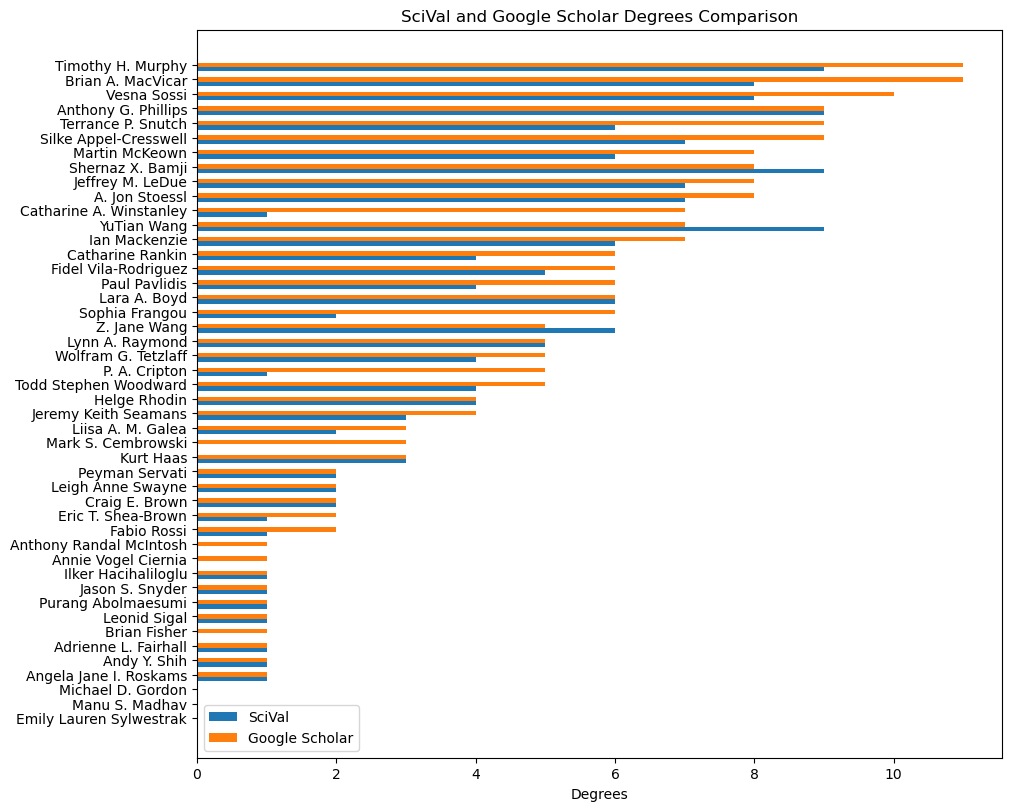

In [92]:
degree_df = pd.DataFrame({
    "Name":combined_df["sv_name"].to_list(),
    "SciVal":combined_df["sv_degree"].to_list(),
    "Google Scholar":combined_df["gs_degree"].to_list(),
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Degrees")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Degrees")
ax.set_title('SciVal and Google Scholar Degrees Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend()

<bound method NDFrame.head of                        Name  SciVal  Google Scholar
38  Emily Lauren Sylwestrak       0               0
32           Manu S. Madhav       0               0
24        Michael D. Gordon       0               0
22   Angela Jane I. Roskams       1               1
39             Andy Y. Shih       1               1
36     Adrienne L. Fairhall       1               1
33             Brian Fisher       0               1
25             Leonid Sigal       1               1
44       Purang Abolmaesumi       1               1
10          Jason S. Snyder       1               1
42      Ilker Hacihaliloglu       1               1
1       Annie Vogel Ciernia       0               1
43  Anthony Randal McIntosh       0               1
21              Fabio Rossi       1               2
37       Eric T. Shea-Brown       1               2
35           Craig E. Brown       2               2
34        Leigh Anne Swayne       2               2
27           Peyman Servati       

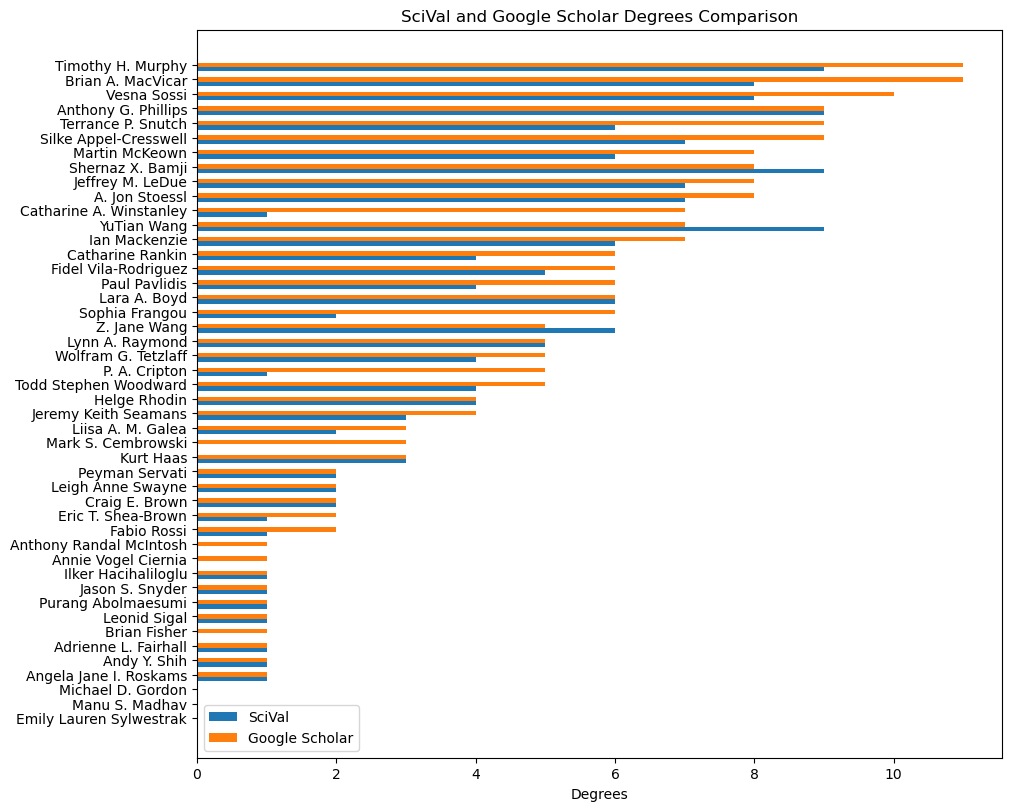

In [71]:
degree_df = pd.DataFrame({
    "Name":combined_df["sv_name"].to_list(),
    "SciVal":combined_df["sv_degree"].to_list(),
    "Google Scholar":combined_df["gs_degree"].to_list(),
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Degrees")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Degrees")
ax.set_title('SciVal and Google Scholar Degrees Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend()